In [1]:
import numpy as np
from grid import Grid

g = Grid()
g.print()

-------------------------------
| 0,0 | 1,0 | 2,0 | 3,0 | 4,0 | 
-------------------------------
| 0,1 | 1,1 | 2,1 | 3,1 | 4,1 | 
-------------------------------
| 0,2 | 1,2 | 2,2 | 3,2 | 4,2 | 
-------------------------------
| 0,3 | 1,3 | 2,3 | 3,3 | 4,3 | 
-------------------------------
| 0,4 | 1,4 | 2,4 | 3,4 | 4,4 | 
-------------------------------


# Human Tests

In [4]:
from actors import Human

h = Human(g)
h.run()

Steps: 6
Rewards: 10
---------------------
|   |   |   |   |   | 
---------------------
|   |   |   |   | o | 
---------------------
|   |   |   |   |   | 
---------------------
|   |   |   |   |   | 
---------------------
|   |   |   |   |   | 
---------------------
(4, 1)


# AI

## Q-Learning

In [2]:
from actors import QLearning

q = QLearning(g)
q.run()

print('Steps:', q.steps)
print('Rewards:', q.totalReward)


Steps: 1496
Rewards: -22


In [3]:
for episodes in range(500):
    q.resetCount()
    q.run()

print('Episodes:', episodes)
print('Steps:', q.steps)
print('Rewards:', q.totalReward)

Episodes: 499
Steps: 6
Rewards: 10


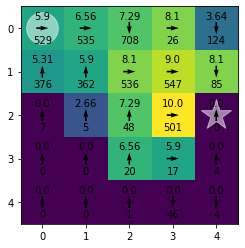

In [4]:
x = q.plot()

## Dyna-Q

In [2]:
from actors import DynaQ

d = DynaQ(g)
d.run()

print('Steps:', d.steps)
print('Rewards:', d.totalReward)

Steps: 135
Rewards: -1


In [3]:
for episodes in range(500):
    d.resetCount()
    d.run()

print('Episodes:', episodes)
print('Steps:', d.steps)
print('Rewards:', d.totalReward)

Episodes: 499
Steps: 6
Rewards: 10


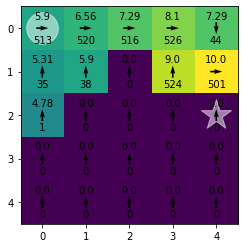

In [4]:
d.plot()

## Priority Sweeping 

In [13]:
from actors import PiorSweep

p = PiorSweep(g)
p.run()

print('Steps:', p.steps)
print('Rewards:', p.totalReward)

Steps: 58
Rewards: -6


In [14]:
for episodes in range(100):
    p.resetCount()
    p.run(epsilon=0.1)

print('Episodes:', episodes)
print('Steps:', p.steps)
print('Rewards:', p.totalReward)

Episodes: 99
Steps: 6
Rewards: 10


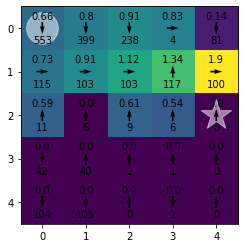

In [15]:
p.plot()

# Imitation Learning

In [5]:
d.trajectory

[{'s': (0, 0), 'a': (1, 0)},
 {'s': (1, 0), 'a': (1, 0)},
 {'s': (2, 0), 'a': (1, 0)},
 {'s': (3, 0), 'a': (1, 0)},
 {'s': (3, 1), 'a': (0, -1)},
 {'s': (4, 1), 'a': (1, 0)}]

In [6]:
from actors import BehavioralCloning

bc = BehavioralCloning(g)
# bc.imitate([h.trajectory, q.trajectory, d.trajectory, p.trajectory])
pi, p = bc.imitate(d.trajectory)
p
# bc.run()

# print('Steps:', p.steps)
# print('Rewards:', p.totalReward)

c:\Users\guilherme.albarrans\OneDrive - Ame Digital\Área de Trabalho\RL\Gridworld\actors.py:227: RuntimeWarning: invalid value encountered in long_scalars
  p = lambda s,a: n[s,a] / sum(n[s])


array([[ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]])

In [8]:
g.S[:10]

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1)]

In [9]:
g.ACTIONS

[(0, -1), (0, 1), (1, 0), (-1, 0)]